# MAJOR PROJECT - Interaction-Based Ligand Prediction for Targeted Drug Discovery  [Part 4] Regression Models with Random Forest

Ashwat Kumar
Deepak Kumar

Here, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/data/acetocholine data

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/data/acetocholine data


## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(4695, 881)

In [ ]:
Y.shape

(4695,)

### **3.4. Remove low variance features**

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
#selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
#X = selection.fit_transform(X)

In [ ]:
X.shape

(4695, 881)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((3756, 881), (3756,))

In [ ]:
X_test.shape, Y_test.shape

((939, 881), (939,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.542738416957975

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([ 6.56928804,  6.22171397,  8.10009533,  6.40018255,  5.94480735,
        3.76782007,  5.2320862 ,  6.07028365,  5.03767605,  4.86017836,
        7.20522878,  3.97309431,  5.36837304,  4.97487884,  5.5162056 ,
        4.88467452,  8.42975373,  8.30286056,  4.69901511,  4.9125316 ,
        8.40417266,  5.21049238,  2.99235714,  4.79498681,  4.62732805,
        5.1376451 ,  6.19860714,  5.42360492,  5.14239579,  4.76314733,
        4.27563007,  6.14995982,  5.78523555,  4.19369321,  2.44939481,
        4.34081117,  5.20743123,  6.11134222,  6.53718841,  5.51971702,
        6.33438224,  5.2061658 ,  5.29135071,  6.11507708,  5.50981687,
        6.01236444,  5.56071059,  5.74301676,  6.57110267,  4.82954051,
        6.86129327,  5.24712481,  5.88102135,  7.37216136,  6.53754529,
        6.29407313,  5.24982049,  4.30690412,  6.87550899,  6.17518098,
        5.26212611,  5.48919371,  5.55369161,  5.64161773,  4.99379767,
        6.46779362,  5.32934051,  3.67463944,  4.69237264,  5.40

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

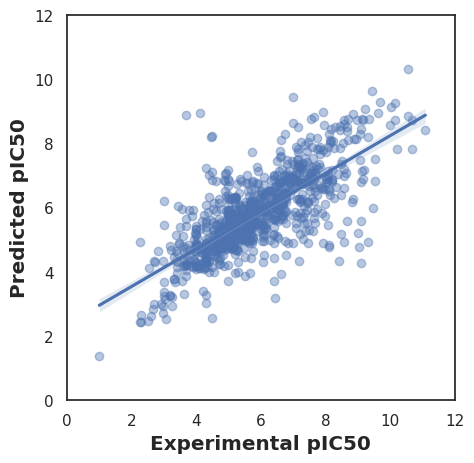

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style of the plots
sns.set(color_codes=True)
sns.set_style("white")

# Create a regression plot with experimental and predicted values
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})

# Label the axes with bold, large font
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

# Set the limits for the axes
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# Adjust the size of the figure
ax.figure.set_size_inches(5, 5)

# Display the plot
plt.show()


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/data/acetocholine data/input descriptor
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

/content/drive/MyDrive/Colab Notebooks/data/acetocholine data/input descriptor
--2024-06-04 10:42:35--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-06-04 10:42:36--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M  54.8MB/s    in 0.4s    

2024-06-04 10:42:37 (54.8 MB/s

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
import pandas as pd
dftest = pd.read_csv('test_SMILES.csv')
dftest



,SMILES
0,O=C([O-])C(=O)O
1,O=S(=O)([O-])[N-]S(=O)(=O)[O-]
2,O=S(=O)([O-])OS(=O)(=O)[O-]
3,O=C([O-])[C@]1(C(=O)O)CCCO1
4,O=C([O-])C(=O)C[C@H](O)C(=O)[O-]
5,O=C([O-])[C@@H](O)C(O)[C@H](O)C(=O)[O-]
6,[NH3+][C@H](C[C@@H](C(=O)[O-])C(=O)O)C(=O)[O-]
7,O=C(O)[C@H]1C[C@@]1(C(=O)[O-])C(=O)O
8,O=C([O-])CS(=O)CC(=O)[O-]
9,O=C(O)CCC[C@@H](O)C(=O)[O-]


In [ ]:
selection = ['SMILES']
dftest_selection = dftest[selection]
dftest_selection.to_csv('input.smi', sep='\t', index=False, header=False)


In [ ]:
! cat input.smi | head -5

O=C([O-])C(=O)O
O=S(=O)([O-])[N-]S(=O)(=O)[O-]
O=S(=O)([O-])OS(=O)(=O)[O-]
O=C([O-])[C@]1(C(=O)O)CCCO1
O=C([O-])C(=O)C[C@H](O)C(=O)[O-]


In [ ]:
! cat input.smi | wc -l

51


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing AUTOGEN_input_1 in input.smi (1/51). 
Processing AUTOGEN_input_2 in input.smi (2/51). 
Descriptor calculation completed in 12.2 secs . Average speed: 0.24 s/mol.


In [ ]:
ls -l


total 75708
-rw------- 1 root root   102170 Jun  4 08:29 descriptors_output.csv
-rw------- 1 root root      183 Jun  4 08:34 descriptors_output.gsheet
-rw------- 1 root root     1683 Jun  4 10:42 input.smi
drwx------ 2 root root     4096 Jun  4 08:25 __MACOSX/
drwx------ 2 root root     4096 May 30  2020 PaDEL-Descriptor/
-rw------- 1 root root      231 Jun  4 08:25 padel.sh
-rw------- 1 root root      231 Jun  4 08:25 padel.sh.1
-rw------- 1 root root      231 Jun  4 10:42 padel.sh.2
-rw------- 1 root root 25768637 Jun  4 08:25 padel.zip
-rw------- 1 root root 25768637 Jun  4 08:25 padel.zip.1
-rw------- 1 root root 25768637 Jun  4 10:42 padel.zip.2
-rw------- 1 root root   101205 Jun  4 08:39 Processed_smiles_pubchem_fp.csv
-rw------- 1 root root     1742 Jun  4 08:04 test_SMILES.csv


In [ ]:
dfnew = pd.read_csv('descriptors_output.csv')
dfnew

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_input_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_input_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_input_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_input_4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_input_5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AUTOGEN_input_6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,AUTOGEN_input_7,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AUTOGEN_input_8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,AUTOGEN_input_9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,AUTOGEN_input_10,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfnew= dfnew.drop(columns=['Name'])
dfnew

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfnew.to_csv('Processed_smiles_pubchem_fp.csv', index=False)
!ls -1


descriptors_output.csv
descriptors_output.gsheet
input.smi
__MACOSX
PaDEL-Descriptor
padel.sh
padel.sh.1
padel.zip
padel.zip.1
Processed_smiles_pubchem_fp.csv
test_SMILES.csv


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/data/acetocholine data
!ls -l


/content/drive/MyDrive/Colab Notebooks/data/acetocholine data
total 374397
-rw------- 1 root root  5200159 May 28 22:09  acetylcholinesterase_01_bioactivity_data_raw.csv
-rw------- 1 root root   468001 May 28 22:09  acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw------- 1 root root   526341 May 28 22:09  acetylcholinesterase_03_bioactivity_data_curated.csv
-rw------- 1 root root   892008 May 29 03:25  acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw------- 1 root root   658015 May 29 03:25  acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw------- 1 root root  8363459 May 28 15:18  acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw------- 1 root root 18138422 Jun  4 08:45  acetylcholinesterase_dee_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw------- 1 root root      183 May 29 02:02  acetylcholinesterase_dee_bioactivity_data_3class_pIC50_pubchem_fp.gsheet
-rw------- 1 root root   645598 May 28 22:09  acetylcholinesterase.zi

In [ ]:
dfpredicted=pd.read_csv('Copy_of_Processed_smiles_pubchem_fp.csv')


dfpredicted
dfpredicted.shape
predicted = model.predict(dfpredicted)
predicted

array([5.05601519, 5.22686095, 4.96324592, 5.01333944, 5.24205781,
       5.25661438, 6.16637467, 5.33105267, 5.48966095, 5.14604559,
       5.46567386, 5.00487741, 4.5632164 , 5.71787451, 5.71787451,
       4.95494836, 4.84594586, 5.15935609, 4.51316862, 4.84125828,
       4.85327818, 5.4165804 , 4.46531552, 5.57595455, 5.16867387,
       5.08361336, 5.31909648, 4.88112513, 5.20368153, 5.46566262,
       5.41782764, 4.9492352 , 4.8955944 , 5.3135555 , 4.23867753,
       5.17726092, 4.80445394, 4.8874958 , 4.7212103 , 5.26167091,
       5.4190449 , 5.1778603 , 5.08328673, 4.96046309, 6.36578186,
       4.75436779, 4.75344746, 5.04974976, 4.86851393, 5.31737762,
       5.25661438])